In [1]:
from src.pipelines import SimplePipeline
from src.tokenizers import SimpleSentenceTokenizer, SimpleTokenizer
from src.sentiment_analyzer import SimpleSentimentAnalyzer
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def get_text_from_path(path):
    with open(path, 'r') as f:
        return f.read()

In [115]:
book = get_text_from_path('../sample_texts/warandpeace')

In [116]:
features = ['sent_tokenize', 'word_tokenize', 'score_sentiment']
pipeline = SimplePipeline(book, features)

In [117]:
pipeline.run()

In [118]:
sents = pipeline.tokenized_sents
scores = pipeline.sent_scores

In [119]:
pipeline.vocab_size

17485

[Text(0, 0.5, 'Cumulative Sentiment Polarity'),
 Text(0.5, 0, 'Sentence'),
 Text(0.5, 1.0, 'Running Sentiment of "War and Peace"')]

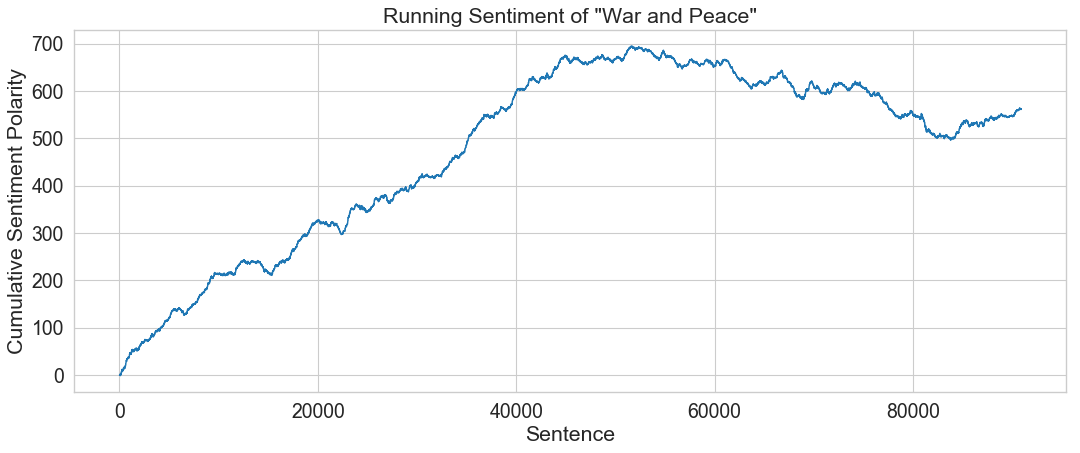

In [121]:
# Prepare data from pipeline
df = pd.DataFrame(list(zip(sents, scores)))
df['time_series'] = df[1].cumsum()
data = {'sents': df.index.values, 'polarity': df['time_series'].values}

# Plot
plt.figure(figsize=(16, 6), dpi=80)
sns.set_style("whitegrid")
sns.set_context("notebook", font_scale=1.6, rc={"lines.linewidth": 1.3})
graph = sns.lineplot(x="sents", y="polarity", data=data, legend='full')
graph.set(xlabel='Sentence', ylabel='Cumulative Sentiment Polarity', title="Running Sentiment of \"Alice in Wonderland\"")